In [1]:
import os
import tweepy as tw
import pandas as pd
from textblob import TextBlob
import re
import nltk
from nltk.tokenize import TweetTokenizer
import numpy as np
from nltk.corpus import stopwords
import string
from nltk import FreqDist
import seaborn as sns

import warnings

In [2]:
df=pd.read_csv('C:/Users/anshi/Desktop/143P/D2search_results_Climate Change.csv')
df

,user_country,source,content,date
0,NaN,Twitter for iPhone,Anyone who doesn’t see how #climatechange cont...,2020-10-22T23:59:51+00:00
1,NaN,Twitter for Android,😂😂 so funny I don't know why he always has do...,2020-10-22T23:59:51+00:00
2,Malta,Twitter Web App,“threatening the life of human society with nu...,2020-10-22T23:59:44+00:00
3,NaN,Twitter for Android,@sarahcpr 😂😂 so funny I don't know why he alw...,2020-10-22T23:59:31+00:00
4,Nevada,Twitter for iPhone,"With climate change feeding wildfires, cops in...",2020-10-22T23:59:19+00:00
...,...,...,...,...
1995,"Washington, DC",Twitter for iPhone,@LucyStag On his own? Hell no. This is one of ...,2020-10-22T21:05:36+00:00
1996,"Springfield, MO",Twitter Web App,@chy2400 This fire is terrible. Climate change...,2020-10-22T21:05:35+00:00
1997,Online,Twitter Web App,@susann_wicke is rounding the plant-plant inte...,2020-10-22T21:05:33+00:00
1998,NaN,Twitter for iPad,“Yet on the other hand it is dedicating substa...,2020-10-22T21:05:32+00:00


In [3]:
tknzr = TweetTokenizer()

def tokenizer_tweets(df):
    
    text = ''
    for t in df['content']:
        text += t
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(df)
print(len(tokens))
print(tokens[:20])

68774
['anyone', 'who', 'doesn', '’', 't', 'see', 'how', '#climatechange', 'contributes', 'to', 'this', 'shouldn', '’', 't', 'drive', 'a', 'car', '.', 'https://t.co/frhbarwhnl😂😂', 'so']


In [4]:
mean = np.mean([len(i) for i in df.content])

print("The lenght's average in tweets: %.2f%%" % mean)

The lenght's average in tweets: 203.57%


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 and (t[0].isalpha())]
    
    return tokens_cl

tokens_cl = clear_tokens(tokens)
print(len(tokens_cl))
print(tokens_cl[:20])

30514
['anyone', 'see', 'contributes', 'drive', 'car', 'funny', 'know', 'always', 'doubts', 'everyone', 'way', 'even', 'science', 'political', 'agenda', 'became', 'sick', 'life', 'human', 'society']


In [7]:
def get_top20_of(i, n=20):
    return FreqDist([t for t in tokens if t.startswith(i)]).most_common(n)

In [8]:
get_top20_of('@')

[('@realdonaldtrump', 62),
 ('@joebiden', 37),
 ('@benshapiro', 11),
 ('@geraldkutney', 11),
 ('@donaldjtrumpjr', 10),
 ('@tedcruz', 10),
 ('@scrowder', 9),
 ('@dbongino', 9),
 ('@greggutfeld', 9),
 ('@spacexcentric', 8),
 ('@hodgetwins', 8),
 ('@dancrenshawtx', 8),
 ('@jim_jordan', 8),
 ('@richardgrenell', 8),
 ('@glennbeck', 8),
 ('@charliekirk11', 8),
 ('@kayleighmcenany', 8),
 ('@dloesch', 8),
 ('@dineshdsouza', 8),
 ('@conceptualjames', 8)]

In [9]:
def clean_tweet(tweet):
    '''
    Function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    #Function to classify sentiments of passed tweets using TextBlob's sentiment method
    analysis = TextBlob(clean_tweet(tweet))
    #set sentiments
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [10]:
df['sentiment'] = [get_tweet_sentiment(t) for t in df.content]
df

,user_country,source,content,date,sentiment
0,NaN,Twitter for iPhone,Anyone who doesn’t see how #climatechange cont...,2020-10-22T23:59:51+00:00,Neutral
1,NaN,Twitter for Android,😂😂 so funny I don't know why he always has do...,2020-10-22T23:59:51+00:00,Negative
2,Malta,Twitter Web App,“threatening the life of human society with nu...,2020-10-22T23:59:44+00:00,Negative
3,NaN,Twitter for Android,@sarahcpr 😂😂 so funny I don't know why he alw...,2020-10-22T23:59:31+00:00,Negative
4,Nevada,Twitter for iPhone,"With climate change feeding wildfires, cops in...",2020-10-22T23:59:19+00:00,Neutral
...,...,...,...,...,...
1995,"Washington, DC",Twitter for iPhone,@LucyStag On his own? Hell no. This is one of ...,2020-10-22T21:05:36+00:00,Positive
1996,"Springfield, MO",Twitter Web App,@chy2400 This fire is terrible. Climate change...,2020-10-22T21:05:35+00:00,Negative
1997,Online,Twitter Web App,@susann_wicke is rounding the plant-plant inte...,2020-10-22T21:05:33+00:00,Neutral
1998,NaN,Twitter for iPad,“Yet on the other hand it is dedicating substa...,2020-10-22T21:05:32+00:00,Positive


In [11]:
df.sentiment.value_counts()

Positive    992
Neutral     533
Negative    475
Name: sentiment, dtype: int64

In [12]:
pos_tweets = df[(df.sentiment == 'Positive')] 
neu_tweets = df[(df.sentiment == 'Neutral')]                                                                   
neg_tweets = df[(df.sentiment == 'Negative')]  
                                                                        
print("Percentage of positive tweets: %.2f%%" %(len(pos_tweets)*100/len(df.sentiment)))
print("Percentage of neutral tweets: %.2f%%" %(len(neu_tweets)*100/len(df.sentiment)))
print("Percentage of negative tweets: %.2f%%" %(len(neg_tweets)*100/len(df.sentiment)))

Percentage of positive tweets: 49.60%
Percentage of neutral tweets: 26.65%
Percentage of negative tweets: 23.75%


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

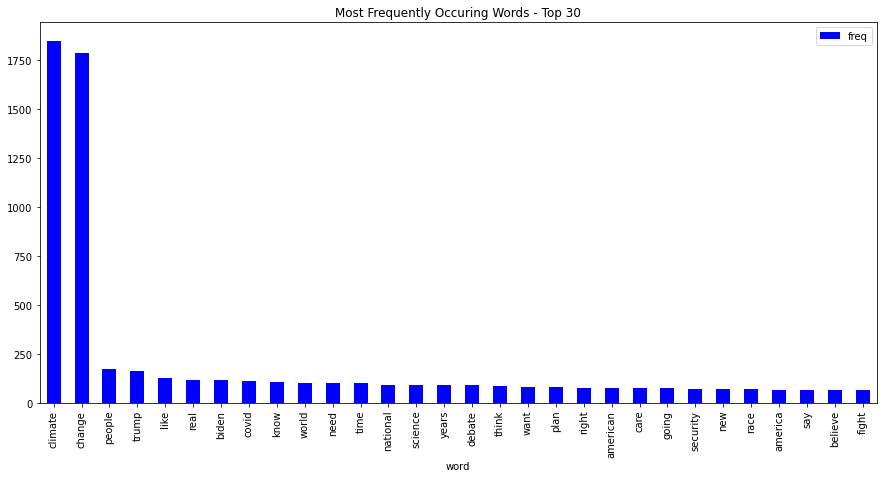

In [14]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tokens_cl)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Comments for Biden-Debate1')

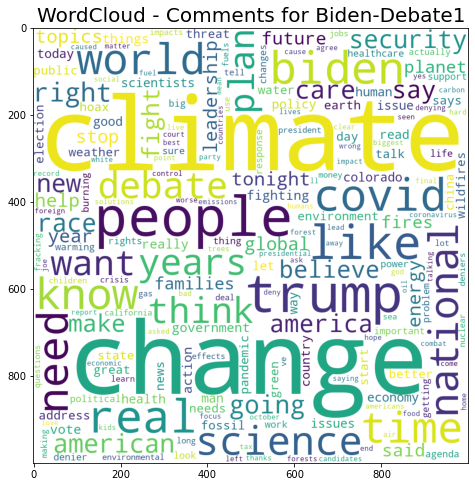

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Comments for Biden-Debate1", fontsize = 20)

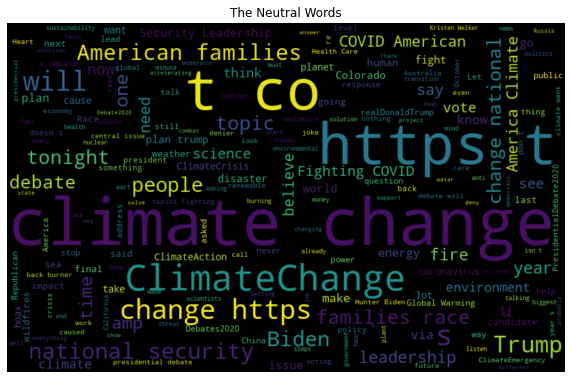

In [16]:
normal_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

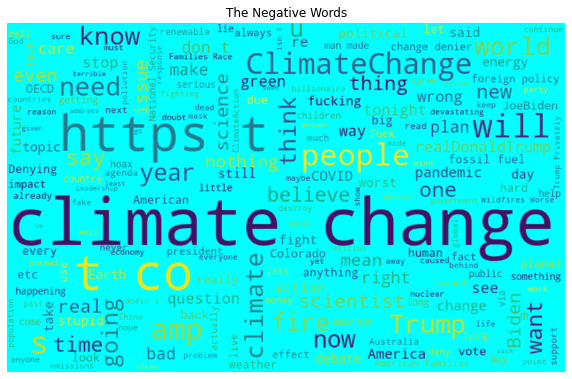

In [17]:
negative_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

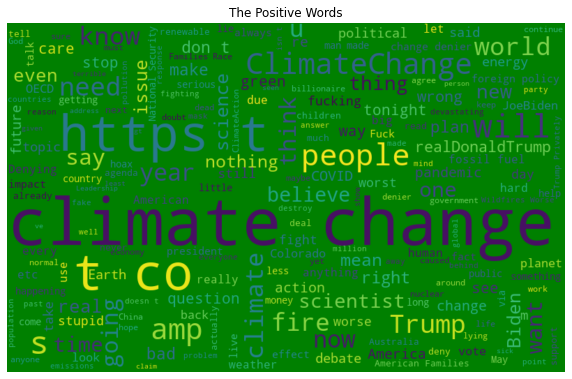

In [18]:
positive_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Positive']])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [19]:
df.drop(['user_country','source','date'],axis=1,inplace=True)
df

,content,sentiment
0,Anyone who doesn’t see how #climatechange cont...,Neutral
1,😂😂 so funny I don't know why he always has do...,Negative
2,“threatening the life of human society with nu...,Negative
3,@sarahcpr 😂😂 so funny I don't know why he alw...,Negative
4,"With climate change feeding wildfires, cops in...",Neutral
...,...,...
1995,@LucyStag On his own? Hell no. This is one of ...,Positive
1996,@chy2400 This fire is terrible. Climate change...,Negative
1997,@susann_wicke is rounding the plant-plant inte...,Neutral
1998,“Yet on the other hand it is dedicating substa...,Positive


In [20]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [21]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [22]:
testing = df.content[:2000]

In [23]:
from bs4 import BeautifulSoup

In [24]:

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [25]:
Cleaned_data= {'sentiment':df['sentiment'], 
        'content':test_result} 

In [26]:
data=pd.DataFrame(Cleaned_data)
data

,sentiment,content
0,Neutral,anyone who doesn t see how climatechange contr...
1,Negative,so funny i don t know why he always has doubts...
2,Negative,threatening the life of human society with nuc...
3,Negative,so funny i don t know why he always has doubts...
4,Neutral,with climate change feeding wildfires cops ins...
...,...,...
1995,Positive,on his own hell no this is one of the chief ch...
1996,Negative,this fire is terrible climate change is going ...
1997,Neutral,wicke is rounding the plant plant interaction ...
1998,Positive,yet on the other hand it is dedicating substan...


In [27]:
df1=data[data.sentiment == 'Positive']

In [28]:
df2=data[data.sentiment == 'Negative']

In [29]:
df3=df1.append(df2) 
df3

,sentiment,content
7,Positive,talk about a critical appointment with not in ...
10,Positive,it would have been so easy to steer the ship l...
12,Positive,when potus is asked about climate change he sh...
13,Positive,no they re just smart enough to know that the ...
16,Positive,as comm bishop says a new generation of activi...
...,...,...
1982,Negative,obama biden were the most morally corrupt pres...
1987,Negative,freedom of information requests show that defe...
1991,Negative,having recently suffered from weather some say...
1992,Negative,roosevelt income inequality is at a record hig...


In [30]:
df3=df3.replace('Positive',1).replace('Negative',0)

In [31]:
df3

,sentiment,content
7,1,talk about a critical appointment with not in ...
10,1,it would have been so easy to steer the ship l...
12,1,when potus is asked about climate change he sh...
13,1,no they re just smart enough to know that the ...
16,1,as comm bishop says a new generation of activi...
...,...,...
1982,0,obama biden were the most morally corrupt pres...
1987,0,freedom of information requests show that defe...
1991,0,having recently suffered from weather some say...
1992,0,roosevelt income inequality is at a record hig...


In [32]:
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer

In [33]:
train, test = train_test_split(df3, test_size=0.25, random_state=42)
print(train.shape)
print(test.shape)

(1100, 2)
(367, 2)


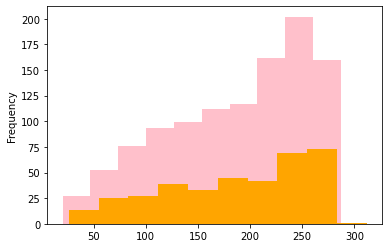

In [34]:
length_train = train['content'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['content'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [35]:
tokenized_tweet = train['content'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['content']), epochs=20)

(469661, 712820)

In [36]:
model_w2v.wv.most_similar(positive = "trump")

[('donald', 0.756462574005127),
 ('administration', 0.7463989853858948),
 ('supporter', 0.746053159236908),
 ('trumpispathetic', 0.7361512780189514),
 ('joe', 0.7282179594039917),
 ('privately', 0.7259392142295837),
 ('destroys', 0.7252606153488159),
 ('biden', 0.7220643758773804),
 ('neither', 0.7199810147285461),
 ('increase', 0.7196581959724426)]

In [37]:
model_w2v.wv.most_similar(negative = "trum")

[('by', -0.3045303225517273),
 ('an', -0.3152986764907837),
 ('trees', -0.3311944603919983),
 ('such', -0.33912181854248047),
 ('government', -0.3477363586425781),
 ('our', -0.36484214663505554),
 ('fossil', -0.37216392159461975),
 ('as', -0.3728811740875244),
 ('green', -0.37574613094329834),
 ('new', -0.37687137722969055)]

In [38]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow.keras as keras


In [39]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
Tr=train["content"].values.tolist()
Te=test["content"].values.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
x_train = cv.fit_transform(Tr).toarray()
y_train = train.iloc[:, 0]
y_test=test.iloc[:,0]
print(x_train.shape)
print(y_train.shape)

cv = CountVectorizer(max_features = 500)
x_test = cv.fit_transform(Te).toarray()

print(x_test.shape)

(1100, 500)
(1100,)
(367, 500)


In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.45231607629427795
F1 score : 0.41399416909620995
[[ 95  33]
 [168  71]]


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9981818181818182
Validation Accuracy : 0.5694822888283378
f1 score : 0.69140625
[[ 32  96]
 [ 62 177]]


In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.4087193460490463
f1 score : 0.3323076923076923
[[ 96  32]
 [185  54]]


In [46]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9236363636363636
Validation Accuracy : 0.6512261580381471
f1 score : 0.7866666666666666
[[  3 125]
 [  3 236]]


In [47]:
imdb_tokenizer = Tokenizer(num_words=500)
imdb_tokenizer.fit_on_texts(train['content'].values)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(train['content'].values)
x_val_seq = imdb_tokenizer.texts_to_sequences(test['content'].values)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = train['sentiment'].values, test['sentiment'].values

print('First sample before preprocessing: \n', train['content'].values[0], '\n')
print('First sample after preprocessing: \n', x_train[0])

First sample before preprocessing: 
 eternal i totally agree esp with all the recent peace deals setting that up my point tho and i ve felt this way for awhile now is that whenever people like gates mention climate change it s comms for human death and destruction in one form or another i d to be wrong on that tho 

First sample after preprocessing: 
 [ 13 306  24  34   1  11  61  52 324   5  13 111  20 190  15  53   6  11
  39  55   2   4  10  12  15 145   5   9  67  46  13 191   3  23 256  14
  11   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

In [48]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [49]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 40)           1200000   
_________________________________________________________________
dropout (Dropout)            (None, 500, 40)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250) 

In [50]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
8/8 - 2s - loss: 0.6467 - accuracy: 0.6455 - val_loss: 0.6410 - val_accuracy: 0.6636
Epoch 2/20
8/8 - 1s - loss: 0.6283 - accuracy: 0.6869 - val_loss: 0.6400 - val_accuracy: 0.6636
Epoch 3/20
8/8 - 1s - loss: 0.6205 - accuracy: 0.6869 - val_loss: 0.6399 - val_accuracy: 0.6636
Epoch 4/20
8/8 - 1s - loss: 0.6138 - accuracy: 0.6869 - val_loss: 0.6345 - val_accuracy: 0.6636
Epoch 5/20
8/8 - 1s - loss: 0.6051 - accuracy: 0.6869 - val_loss: 0.6307 - val_accuracy: 0.6636
Epoch 6/20
8/8 - 1s - loss: 0.5907 - accuracy: 0.6869 - val_loss: 0.6216 - val_accuracy: 0.6636
Epoch 7/20
8/8 - 1s - loss: 0.5702 - accuracy: 0.6869 - val_loss: 0.6078 - val_accuracy: 0.6636
Epoch 8/20
8/8 - 1s - loss: 0.5368 - accuracy: 0.6869 - val_loss: 0.5899 - val_accuracy: 0.6636
Epoch 9/20
8/8 - 1s - loss: 0.4911 - accuracy: 0.7030 - val_loss: 0.5707 - val_accuracy: 0.6545
Epoch 10/20
8/8 - 1s - loss: 0.4416 - accuracy: 0.7838 - val_loss: 0.5524 - val_accuracy: 0.7091
Epoch 11/20
8/8 - 1s - loss: 0.3836 - a

In [51]:
df4=data.replace('Positive',1).replace('Negative',0).replace('Neutral',-1)
df4

,sentiment,content
0,-1,anyone who doesn t see how climatechange contr...
1,0,so funny i don t know why he always has doubts...
2,0,threatening the life of human society with nuc...
3,0,so funny i don t know why he always has doubts...
4,-1,with climate change feeding wildfires cops ins...
...,...,...
1995,1,on his own hell no this is one of the chief ch...
1996,0,this fire is terrible climate change is going ...
1997,-1,wicke is rounding the plant plant interaction ...
1998,1,yet on the other hand it is dedicating substan...


In [52]:
X=df4['content']
Y=df4['sentiment']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [53]:
TR=X_train.tolist()
TE=X_valid.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
X_Train = cv.fit_transform(TR).toarray()
Y1 = Y_train
Y_test=Y_valid
print(X_Train.shape)
print(Y1.shape)

cv = CountVectorizer(max_features = 500)
X_test = cv.fit_transform(TE).toarray()

print(X_test.shape)

(1500, 500)
(1500,)
(500, 500)


In [54]:
print(X_Train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_valid.shape)

(1500, 500)
(500, 500)
(1500,)
(500,)


In [55]:
model = RandomForestClassifier()
model.fit(X_Train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(Y_valid, Y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_valid, Y_pred)
print(cm)

Training Accuracy : 0.9993333333333333
Validation Accuracy : 0.476
F1 score : [0.51923077 0.18888889 0.5511811 ]
[[ 81  10  32]
 [ 24  17  62]
 [ 84  50 140]]


In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9006666666666666
Validation Accuracy : 0.42
f1 score : [0.33333333 0.30201342 0.52156863]
[[ 32  37  54]
 [  9  45  49]
 [ 28 113 133]]


C:\Users\anshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9993333333333333
Validation Accuracy : 0.402
f1 score : [0.34782609 0.27303754 0.50733753]
[[ 40  44  39]
 [ 20  40  43]
 [ 47 106 121]]


In [58]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.838
Validation Accuracy : 0.574
f1 score : [0.50583658 0.01904762 0.69278997]
[[ 65   0  58]
 [ 17   1  85]
 [ 52   1 221]]


In [59]:
X_Train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
imdb_tokenizer = Tokenizer(num_words=500)
TRain=pd.DataFrame(X_Train)
TEst=pd.DataFrame(X_test)
YTrain=pd.DataFrame(Y_train)
YTest=pd.DataFrame(Y_test)
imdb_tokenizer.fit_on_texts(TR)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(TR)
x_val_seq = imdb_tokenizer.texts_to_sequences(TE)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = YTrain['sentiment'].values, YTest['sentiment'].values

print('First sample before preprocessing: \n', TR, '\n')
print('First sample after preprocessing: \n', X_Train[0])

First sample before preprocessing: 
 ['ben and jerry s criticising the government on climate change is extremely rich we are one of the world leading countries on tackling immediate this', 'climate change is arguably the biggest issue we re facing today but how are corporations working to solve it ecoplant is helping industrial facilities optimize energy consumption using artificial intelligence to read more head over to', 'i make out with someone in all of my climate change videos', 'ok is not taking climate change seriously a moderate position', 'i love climate change', 'really hope you passionate vote for joe ppl keep that same energy about creating a better america if he wins i don t wanna see none of you neolibs who were screaming about defunding the police and climate change worshiping a man who isn t for defunding and supports fracking', 'billionaires are individuals with individual concerns like anyone unlike popular left twitter opinion climate change isn t as much a position 

In [61]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [62]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 40)           1200000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 40)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250

In [63]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
11/11 - 2s - loss: 0.5771 - accuracy: 0.2585 - val_loss: 0.5143 - val_accuracy: 0.2733
Epoch 2/20
11/11 - 2s - loss: 0.5169 - accuracy: 0.2452 - val_loss: 0.5167 - val_accuracy: 0.2733
Epoch 3/20
11/11 - 2s - loss: 0.5067 - accuracy: 0.2452 - val_loss: 0.5141 - val_accuracy: 0.2733
Epoch 4/20
11/11 - 2s - loss: 0.4762 - accuracy: 0.2452 - val_loss: 0.4544 - val_accuracy: 0.2733
Epoch 5/20
11/11 - 2s - loss: 0.4036 - accuracy: 0.2452 - val_loss: 0.3605 - val_accuracy: 0.2733
Epoch 6/20
11/11 - 2s - loss: 0.1901 - accuracy: 0.2452 - val_loss: 0.0994 - val_accuracy: 0.3067
Epoch 7/20
11/11 - 2s - loss: -3.2580e-01 - accuracy: 0.3467 - val_loss: -5.2769e-01 - val_accuracy: 0.3867
Epoch 8/20
11/11 - 2s - loss: -1.4352e+00 - accuracy: 0.4081 - val_loss: -1.7079e+00 - val_accuracy: 0.4267
Epoch 9/20
11/11 - 2s - loss: -3.8540e+00 - accuracy: 0.4370 - val_loss: -4.0643e+00 - val_accuracy: 0.4200
Epoch 10/20
11/11 - 2s - loss: -8.7569e+00 - accuracy: 0.4526 - val_loss: -8.1830e+00 - 